In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [272]:
df=pd.read_csv('zomato_1.csv')
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari


In [101]:
df.shape

(51042, 11)

In [4]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [102]:
df.nunique()

name                           8723
online_order                      2
book_table                        2
rate                             32
votes                          2326
location                         93
rest_type                        93
cuisines                       2704
approx_cost(for two people)      70
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

**Trying to create new variable- as others have many unique values**

In [17]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [273]:
# Define a mapping of listed types to type of restaurant
type_to_type_of_rest = {
    'Buffet': 'Casual Dining',
    'Cafes': 'Casual Dining',
    'Dine-out': 'Casual Dining',
    'Delivery': 'Quick Service',
    'Desserts': 'Quick Service',
    'Drinks & nightlife': 'Night Life',
    'Pubs and bars': 'Night Life'
}

# Map the 'listed_in(type)' values to 'type_of_rest'
df['type_of_rest'] = df['listed_in(type)'].map(type_to_type_of_rest)

Casual dining:   This category includes restaurants that offer a relaxed atmosphere and moderately priced food. Buffets, cafes, and dine-out restaurants would fall under this category.
Quick service:   This category includes restaurants that offer fast and convenient food at a lower price. Delivery restaurants and dessert shops would fall under this category.
Nightlife:     This category includes restaurants that focus on drinks and entertainment. Bars and pubs would fall under this category.

In [113]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [274]:
# Lists of locations
north_bengaluru = ['Rajajinagar', 'New BEL Road', 'Malleshwaram', 'Kammanahalli', 'Kalyan Nagar', 'Indiranagar']
south_bengaluru = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Whitefield', 'Sarjapur Road', 'BTM', 'Electronic City', 'Marathahalli', 'Koramangala 4th Block', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'JP Nagar', 'Jayanagar', 'HSR', 'Brookefield']
central_bengaluru = ['Brigade Road', 'Residency Road', 'Church Street', 'Old Airport Road', 'MG Road', 'Lavelle Road', 'Frazer Town']

# Function to categorize locations
def categorize_location(row):
    if row['listed_in(city)'] in north_bengaluru:
        return 'north_bengaluru'
    elif row['listed_in(city)'] in south_bengaluru:
        return 'south_bengaluru'
    elif row['listed_in(city)'] in central_bengaluru:
        return 'central_bengaluru'
    else:
        return 'other'  # Add this line if you want to handle other cases

# Apply the function to create a new column
df['location_type'] = df.apply(categorize_location, axis=1)

Here is the rationale behind the categorization:

North Bangalore: This region is located north of the city center and is home to many IT companies and educational institutions. It is also home to some of the city's most popular tourist destinations, such as the Bannerghatta National Park and the Lalbagh Botanical Gardens.
Central Bangalore: This region is the heart of the city and is home to many of the city's most important landmarks, such as the Vidhana Soudha, the High Court, and the Lal Bagh Botanical Gardens. It is also home to many of the city's most popular shopping and dining destinations.
South Bangalore: This region is located south of the city center and is home to many IT companies and residential areas. It is also home to some of the city's most popular nightlife destinations, such as Koramangala and Indiranagar.

# Dropping redundant columns

In [275]:
# Define the columns to drop
columns_to_drop = ['name', 'listed_in(type)', 'listed_in(city)', 'cuisines','location','rest_type']

# Drop the specified columns in-place
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Changing  Data Types-if required

In [139]:
df.dtypes

online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)    float64
type_of_rest                    object
location_type                   object
dtype: object

In [276]:
# Define the columns to change to 'category' data type
columns_to_change = ['online_order', 'book_table', 'location_type', 'type_of_rest']

# Convert the specified columns to 'category' data type
df[columns_to_change] = df[columns_to_change].astype('category')

**Recheck the data types after the conversion**

In [277]:
df.dtypes

online_order                   category
book_table                     category
rate                            float64
votes                             int64
approx_cost(for two people)     float64
type_of_rest                   category
location_type                  category
dtype: object

# Summary Statistics

**For numerical variables**

In [190]:
df.describe()

,rate,votes,approx_cost(for two people)
count,51042.000000,51042.000000,51042.000000
mean,3.701484,284.507700,555.782983
std,0.395197,805.927478,439.293333
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700449,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


**For categorical features**

In [8]:
df.describe(include = 'category')

,online_order,book_table,type_of_rest,location_type
count,51042,51042,51042,36482
unique,2,2,3,3
top,Yes,No,Quick Service,South Bangalore
freq,30228,44626,29138,14109


# Correlation

In [145]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [146]:
corr =  df_numeric_features.corr()
corr

,rate,votes,approx_cost(for two people)
rate,1.000000,0.428332,0.365608
votes,0.428332,1.000000,0.380882
approx_cost(for two people),0.365608,0.380882,1.000000


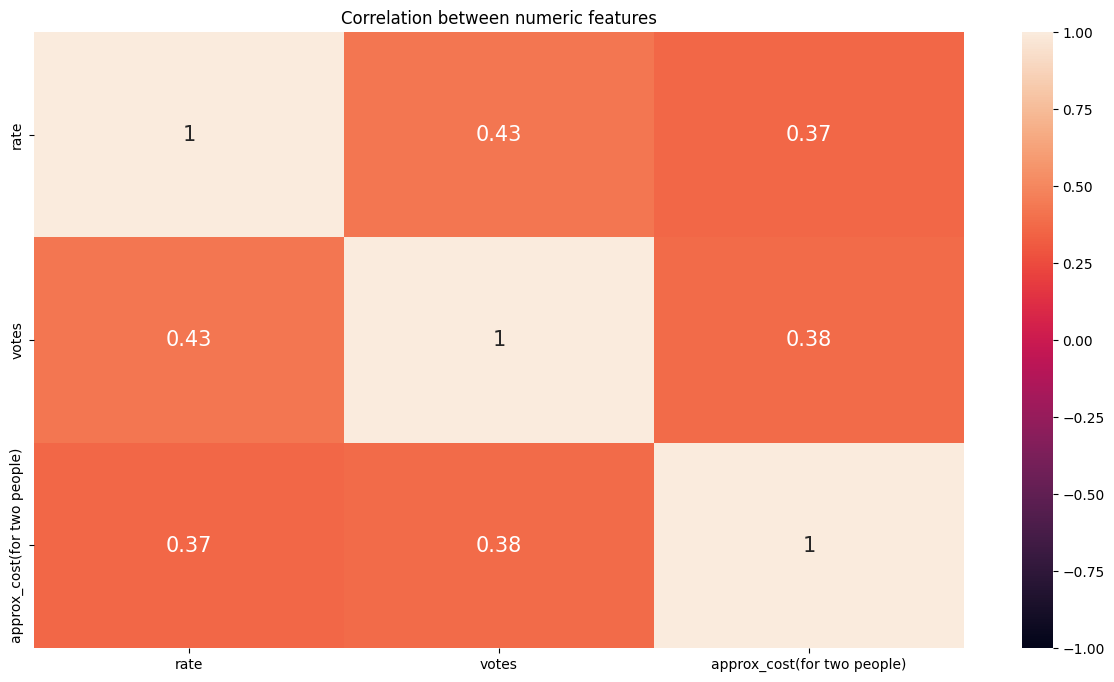

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 15})
plt.title('Correlation between numeric features')
plt.show()

# Analyze Categorical Variables

In [87]:
df.describe(include='category')

,online_order,book_table,location_type,type_of_rest
count,51042,51042,36482,51042
unique,2,2,3,3
top,Yes,No,South Bangalore,Quick Service
freq,30228,44626,14109,29138


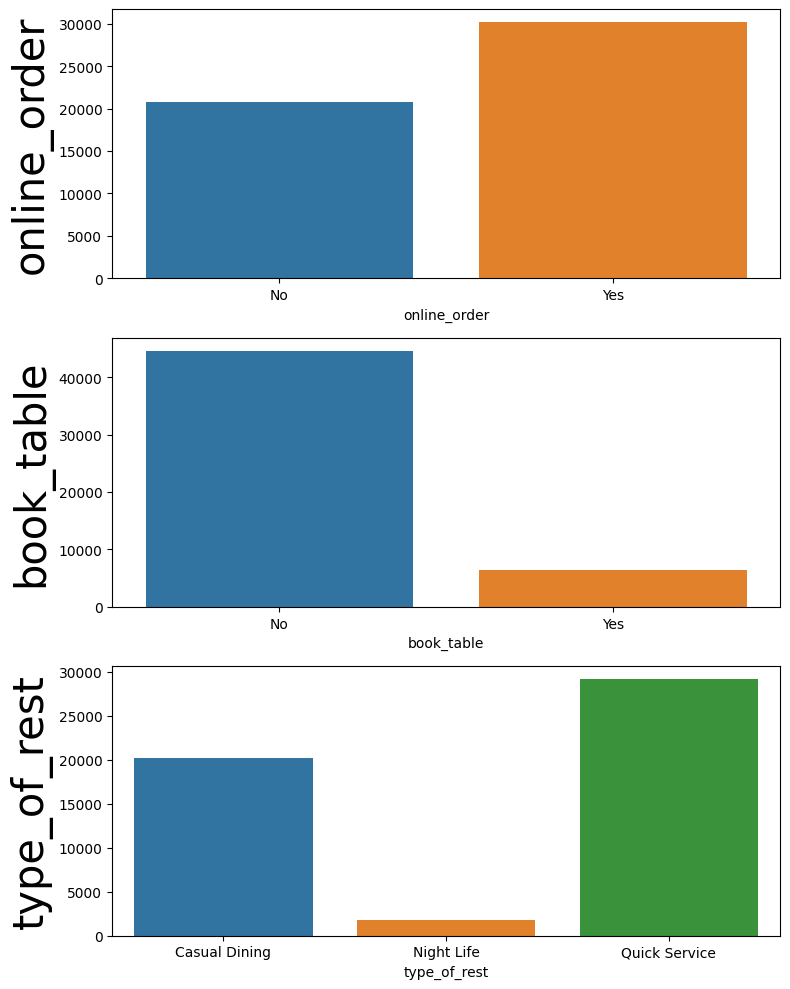

In [12]:
df_categoric_features = df.select_dtypes(include='category')
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    countplot = sns.countplot(x=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)    
plt.tight_layout()   
plt.show()

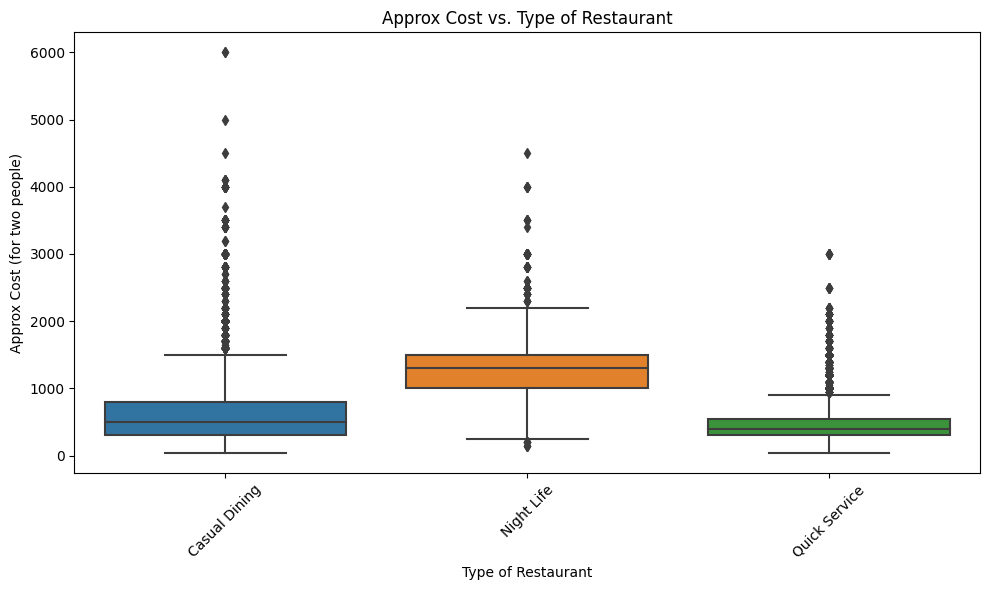

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="type_of_rest", y="approx_cost(for two people)")
plt.title("Approx Cost vs. Type of Restaurant")
plt.xlabel("Type of Restaurant")
plt.ylabel("Approx Cost (for two people)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

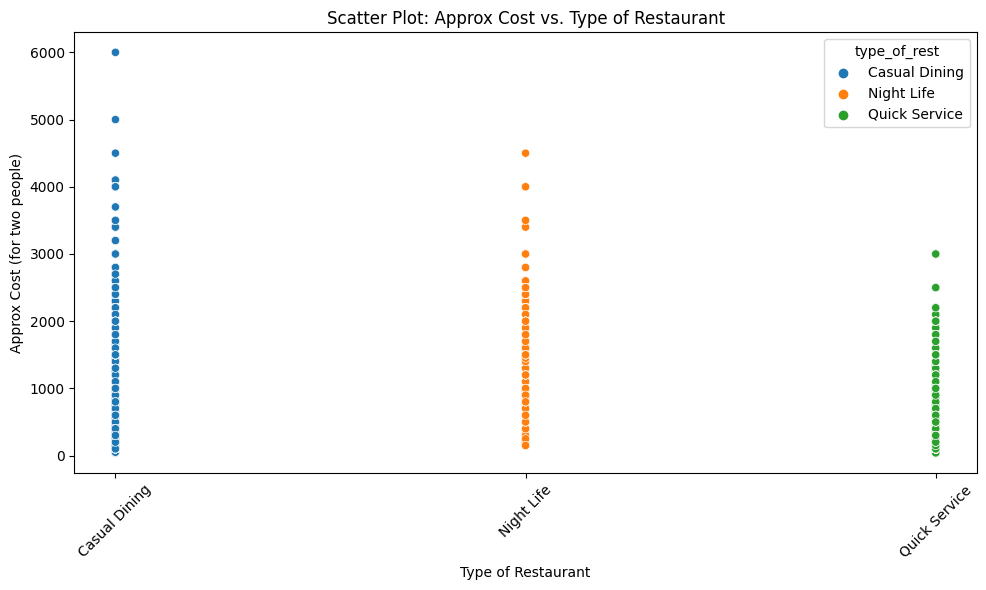

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="type_of_rest", y="approx_cost(for two people)", hue="type_of_rest")
plt.title("Scatter Plot: Approx Cost vs. Type of Restaurant")
plt.xlabel("Type of Restaurant")
plt.ylabel("Approx Cost (for two people)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

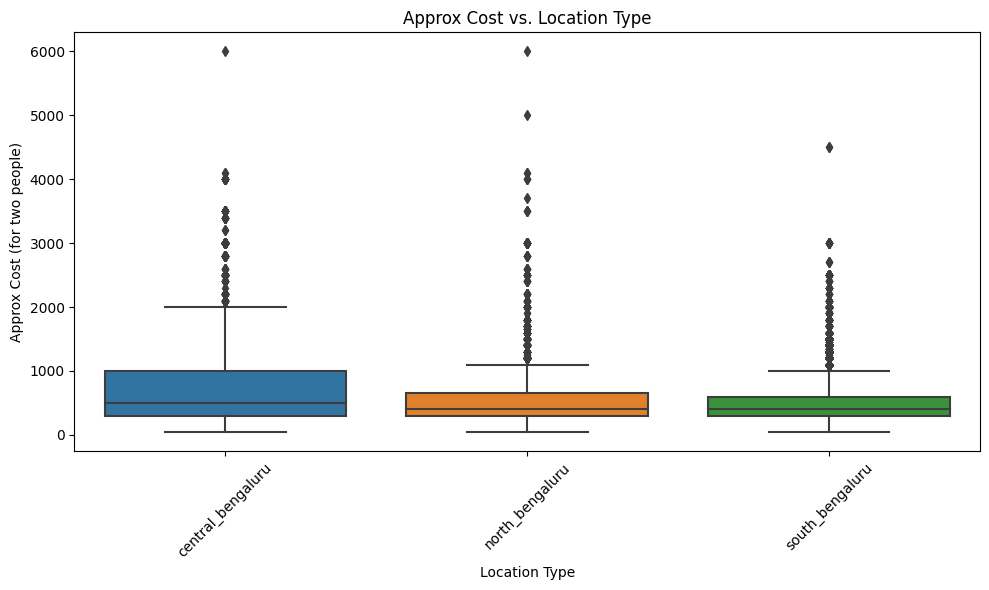

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x="location_type", y="approx_cost(for two people)")
plt.title("Approx Cost vs. Location Type")
plt.xlabel("Location Type")
plt.ylabel("Approx Cost (for two people)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier Treatment 

**Treatment of Votes columns**

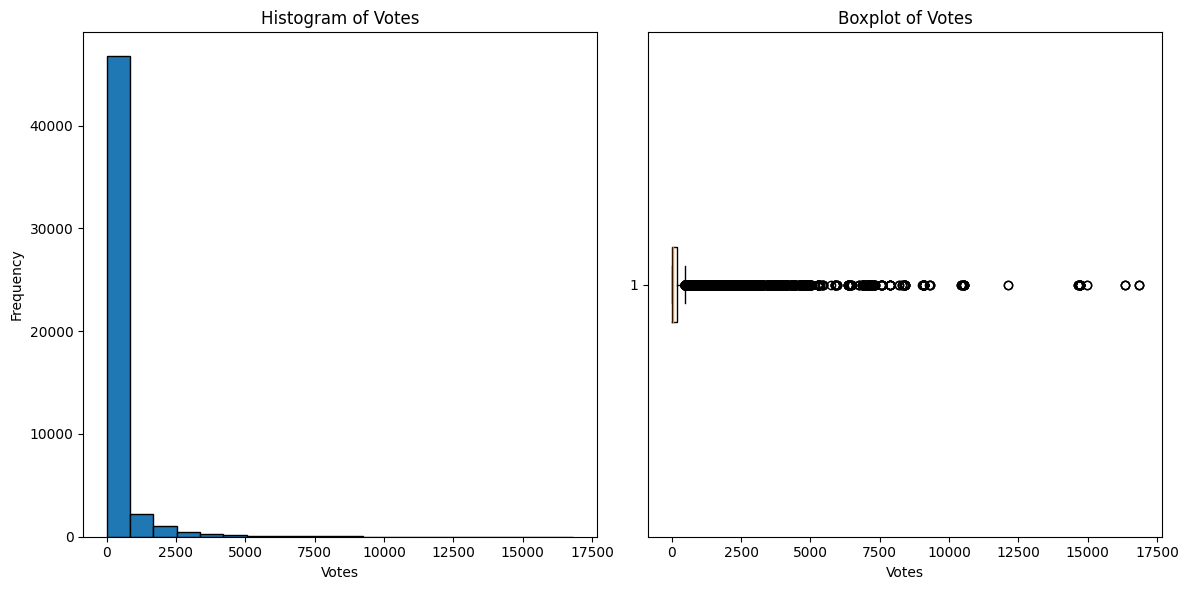

In [33]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot a histogram on the first subplot
ax1.hist(df['votes'], bins=20, edgecolor='black')
ax1.set_title("Histogram of Votes")
ax1.set_xlabel("Votes")
ax1.set_ylabel("Frequency")

# Plot a boxplot on the second subplot
ax2.boxplot(df['votes'], vert=False)
ax2.set_title("Boxplot of Votes")
ax2.set_xlabel("Votes")
plt.tight_layout()
plt.show()

In [191]:
#df.drop(df[df['votes'] > 500].index, inplace=True)

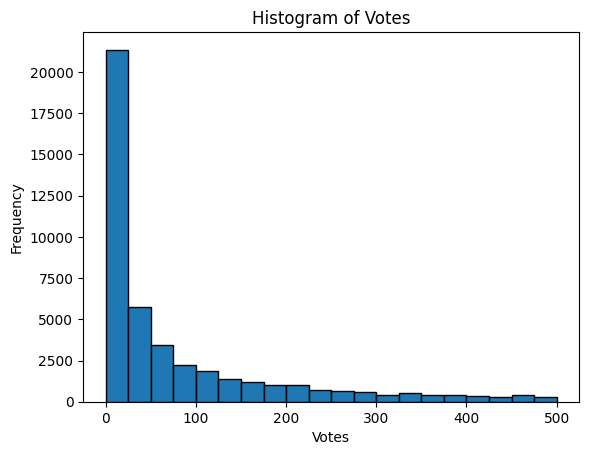

In [158]:
plt.hist(df['votes'], bins=20, edgecolor='black')
plt.title("Histogram of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

**Treatment of Rate**

<AxesSubplot: xlabel='rate'>

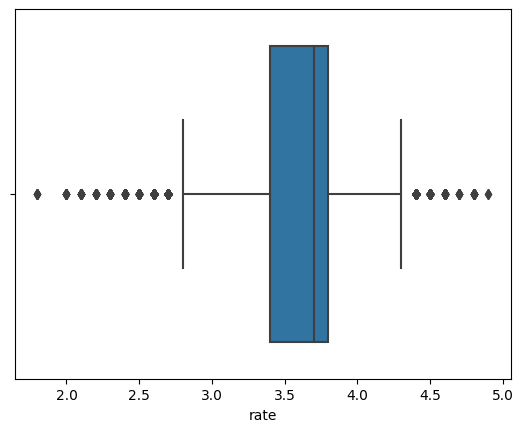

In [67]:
sns.boxplot(df['rate'])

In [192]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
#df['rate'] = df['rate'].apply(lambda x: upper_bound if x > upper_bound else x)
#df['rate'] = df['rate'].apply(lambda x: lower_bound if x < lower_bound else x)

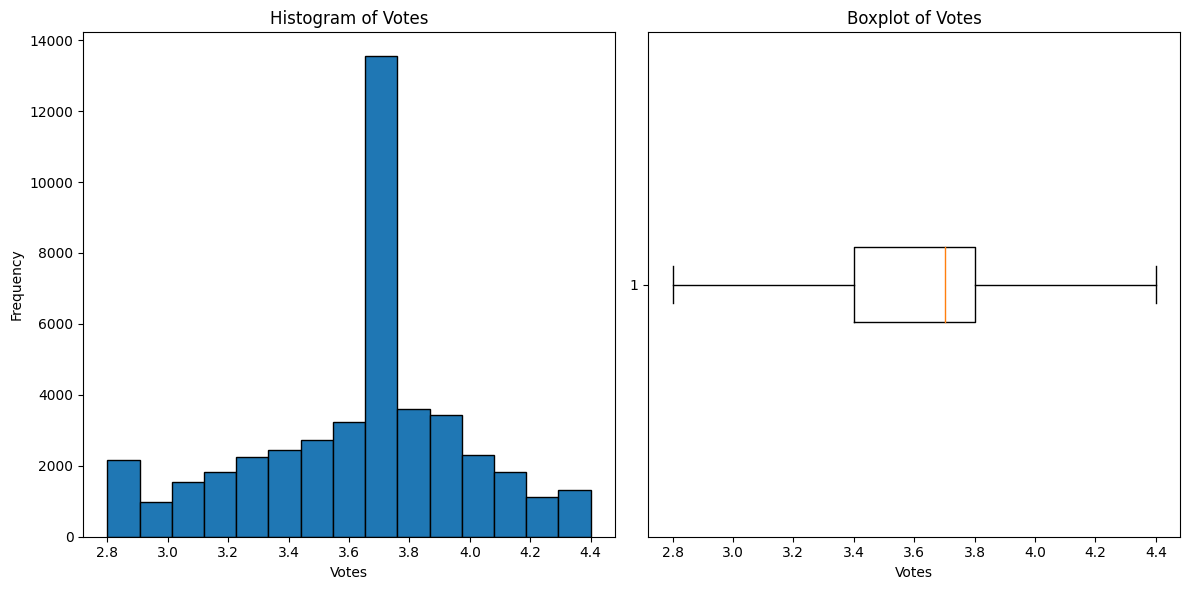

In [160]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot a histogram on the first subplot
ax1.hist(df['rate'], bins=15, edgecolor='black')
ax1.set_title("Histogram of Votes")
ax1.set_xlabel("Votes")
ax1.set_ylabel("Frequency")

# Plot a boxplot on the second subplot
ax2.boxplot(df['rate'], vert=False)
ax2.set_title("Boxplot of Votes")
ax2.set_xlabel("Votes")
plt.tight_layout()
plt.show()

**Treatment of approx_cost(for two people)**

<AxesSubplot: xlabel='approx_cost(for two people)'>

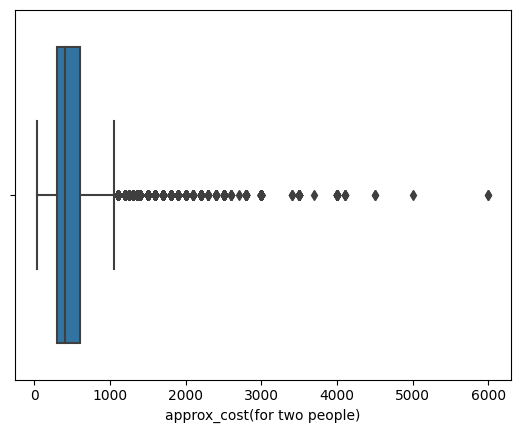

In [161]:
sns.boxplot(df['approx_cost(for two people)'])

In [193]:
#df.drop(df[df['approx_cost(for two people)']>850].index, inplace=True)

<AxesSubplot: xlabel='approx_cost(for two people)'>

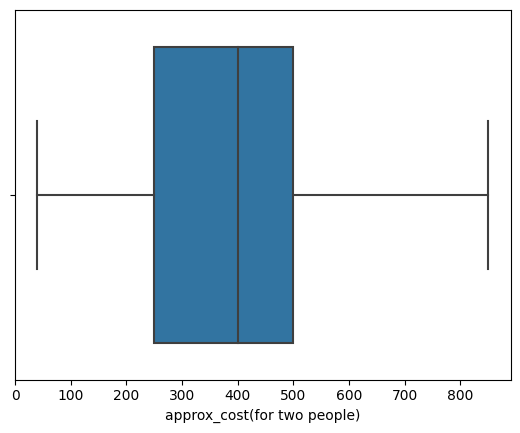

In [194]:
sns.boxplot(df['approx_cost(for two people)'])

# Statistical hypothesis testing 

In [84]:
data=df.copy()

In [72]:
df.dtypes

online_order                   category
book_table                     category
rate                            float64
votes                           float64
approx_cost(for two people)     float64
type_of_rest                   category
location_type                  category
dtype: object

In [147]:
df.head(2)

,online_order,book_table,rate,votes,approx_cost(for two people),type_of_rest,location_type
0,Yes,Yes,4.1,487.0,800.0,Casual Dining,South Bangalore
1,Yes,No,4.1,487.0,800.0,Casual Dining,South Bangalore


In [148]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the columns
online_order_column = "online_order"
rate_column = "approx_cost(for two people)"

# Split data into groups based on online order
group_yes = df[df[online_order_column] == "Yes"][rate_column]
group_no = df[df[online_order_column] == "No"][rate_column]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(group_yes, group_no)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject Null Hypothesis: Online order affects rate")
else:
    print("Fail to Reject Null Hypothesis: Online order does not affect rate")


Reject Null Hypothesis: Online order affects rate


# Simple Linear Regression

In [278]:
X = df[['votes']]  
# Min-Max scaling on the independent variable(s)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding a constant to the independent variables (for intercept in the regression)
X_scaled = sm.add_constant(X_scaled)

# Set the dependent variable
y = df['approx_cost(for two people)']

# Build the OLS model
MLR_model = sm.OLS(y, X_scaled).fit()

# Print the model summary
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.145
Model:                                     OLS   Adj. R-squared:                  0.145
Method:                          Least Squares   F-statistic:                     8661.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:01:07   Log-Likelihood:            -3.7902e+05
No. Observations:                        51042   AIC:                         7.581e+05
Df Residuals:                            51040   BIC:                         7.581e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

--Votes explains 14% variation

In [283]:
X = df[['rate']]  
# Min-Max scaling on the independent variable(s)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding a constant to the independent variables (for intercept in the regression)
X_scaled = sm.add_constant(X_scaled)

# Set the dependent variable
y = df['approx_cost(for two people)']

# Build the OLS model
MLR_model = sm.OLS(y, X_scaled).fit()

# Print the model summary
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.134
Model:                                     OLS   Adj. R-squared:                  0.134
Method:                          Least Squares   F-statistic:                     7875.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:02:25   Log-Likelihood:            -3.7936e+05
No. Observations:                        51042   AIC:                         7.587e+05
Df Residuals:                            51040   BIC:                         7.587e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

--Rate explains only 13% variation

# Multiple Linear Regression

In [284]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Selecting independent variable(s) for the model
X = df[['votes']]  

# Min-Max scaling on the independent variable(s)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding a constant to the independent variables (for intercept in the regression)
X_scaled = sm.add_constant(X_scaled)

# Encode the 'online_order' categorical variable
encoder = OneHotEncoder(drop='first')
encoded_status = encoder.fit_transform(df[['book_table']])
encoded_status_df = pd.DataFrame(encoded_status.toarray(), columns=encoder.get_feature_names(['book_table']))

# Concatenate the scaled independent variable and encoded categorical variable
X_final = pd.concat([pd.DataFrame(X_scaled, columns=['const', 'votes']), encoded_status_df], axis=1)

# Reset indices to align with the dependent variable 'y'
X_final.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Build the OLS model
MLR_model = sm.OLS(y, X_final).fit()

# Print the model summary
print(MLR_model.summary())


                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.402
Model:                                     OLS   Adj. R-squared:                  0.402
Method:                          Least Squares   F-statistic:                 1.714e+04
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:02:44   Log-Likelihood:            -3.6991e+05
No. Observations:                        51042   AIC:                         7.398e+05
Df Residuals:                            51039   BIC:                         7.399e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [285]:
X = df[['votes']]  

# Min-Max scaling on the independent variable(s)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding a constant to the independent variables (for intercept in the regression)
X_scaled = sm.add_constant(X_scaled)

# Encode the 'online_order' categorical variable
encoder = OneHotEncoder(drop='first')
encoded_status = encoder.fit_transform(df[['online_order']])
encoded_status_df = pd.DataFrame(encoded_status.toarray(), columns=encoder.get_feature_names(['online_order']))

# Concatenate the scaled independent variable and encoded categorical variable
X_final = pd.concat([pd.DataFrame(X_scaled, columns=['const', 'votes']), encoded_status_df], axis=1)

# Reset indices to align with the dependent variable 'y'
X_final.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Build the OLS model
MLR_model = sm.OLS(y, X_final).fit()

# Print the model summary
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.154
Model:                                     OLS   Adj. R-squared:                  0.154
Method:                          Least Squares   F-statistic:                     4657.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:02:50   Log-Likelihood:            -3.7875e+05
No. Observations:                        51042   AIC:                         7.575e+05
Df Residuals:                            51039   BIC:                         7.575e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [286]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame containing the Zomato dataset

# Selecting independent variable(s) for the model
X_numerical = df[['votes']]  # Numeric variable(s)
X_categorical = df[['online_order', 'type_of_rest']]  # Categorical variable(s)

# Min-Max scaling on the numeric independent variable(s)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Adding a constant to the numeric independent variables (for intercept in the regression)
X_scaled = sm.add_constant(X_scaled)

# Encode the categorical independent variables
encoder = OneHotEncoder(drop='first')
encoded_status = encoder.fit_transform(X_categorical)
encoded_status_df = pd.DataFrame(encoded_status.toarray(), columns=encoder.get_feature_names(X_categorical.columns))

# Concatenate the scaled numeric independent variable and encoded categorical variables
X_final = pd.concat([pd.DataFrame(X_scaled, columns=['const', 'votes']), encoded_status_df], axis=1)

# Reset indices to align with the dependent variable 'y'
X_final.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Set the dependent variable
y = df['approx_cost(for two people)']

# Build the OLS model
MLR_model = sm.OLS(y, X_final).fit()

# Print the model summary
print(MLR_model.summary())


                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.259
Model:                                     OLS   Adj. R-squared:                  0.259
Method:                          Least Squares   F-statistic:                     4465.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:02:54   Log-Likelihood:            -3.7537e+05
No. Observations:                        51042   AIC:                         7.507e+05
Df Residuals:                            51037   BIC:                         7.508e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Multicollinearity check

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
predictor_vars =['votes','rate','approx_cost(for two people)']

# Add a constant term for the intercept in the VIF calculation
X = add_constant(df[predictor_vars])

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                      Variable         VIF
0                        const  106.777491
1                        votes    1.318445
2                         rate    1.301094
3  approx_cost(for two people)    1.242658


In [231]:
df_org=df.copy()

# Preparing  Data

**Filter numerical and categorical variables**

In [288]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [289]:
df_categoric_features = df.select_dtypes(include='category')
df_categoric_features.columns

Index(['online_order', 'book_table', 'type_of_rest', 'location_type'], dtype='object')

**Dummy encode the catergorical variables**

In [290]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

**Non-Scaled data+  Dummy Encoded**

In [291]:
df_zomato= pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_zomato.head()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru
0,4.1,775,800.0,1,1,0,0,0,1
1,4.1,787,800.0,1,0,0,0,0,1
2,3.8,918,800.0,1,0,0,0,0,1
3,3.7,88,300.0,0,0,0,0,0,1
4,3.8,166,600.0,0,0,0,0,0,1


**Scaled Data + Dummy Encoded**

In [292]:
df1=df.copy()

In [293]:
# scale the independent numeric variables
df1.iloc[:,2:5] = df1.iloc[:, 2:5].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df1.head()

,online_order,book_table,rate,votes,approx_cost(for two people),type_of_rest,location_type
0,Yes,Yes,0.741935,0.046043,0.127517,Casual Dining,south_bengaluru
1,Yes,No,0.741935,0.046756,0.127517,Casual Dining,south_bengaluru
2,Yes,No,0.645161,0.054539,0.127517,Casual Dining,south_bengaluru
3,No,No,0.612903,0.005228,0.043624,Casual Dining,south_bengaluru
4,No,No,0.645161,0.009862,0.093960,Casual Dining,south_bengaluru


In [294]:
numerical_columns = df1.select_dtypes(include=['float64'])
numerical_df = df1[numerical_columns.columns]

In [295]:
df_scaled= pd.concat([numerical_df, df_categoric_features], axis=1)

In [244]:
df_scaled

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru
3,0.562500,0.176,0.320988,0,0,0,0,0,1
4,0.625000,0.332,0.691358,0,0,0,0,0,1
5,0.625000,0.572,0.691358,1,0,0,0,0,1
6,0.500000,0.016,0.938272,0,0,0,0,0,1
8,0.750000,0.648,0.814815,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
50999,0.562500,0.068,0.938272,0,0,1,0,0,1
51002,0.000000,0.162,0.938272,0,0,1,0,0,1
51034,0.562500,0.068,0.938272,0,0,1,0,0,1
51036,0.000000,0.162,0.938272,0,0,1,0,0,1


In [249]:
# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

#  Multiple  Linear Regression (OLS)-Full Model

**Full Model without scaled data**

In [303]:
df1=df_zomato.copy()

In [304]:
# add the intercept column to the dataset
df1 = sm.add_constant(df1)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df1.drop(['approx_cost(for two people)'], axis=1)

# extract the target variable from the data set
y = df1[['approx_cost(for two people)']]

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [305]:
linreg_fullmodel_notscaled = sm.OLS(y_train["approx_cost(for two people)"], X_train).fit()

# print the summary output
print(linreg_fullmodel_notscaled.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.472
Model:                                     OLS   Adj. R-squared:                  0.472
Method:                          Least Squares   F-statistic:                     4271.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:04:27   Log-Likelihood:                 57568.
No. Observations:                        38281   AIC:                        -1.151e+05
Df Residuals:                            38272   BIC:                        -1.150e+05
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [306]:
# predict the charges using predict()
predicted_claim = linreg_fullmodel_notscaled.predict(X_test)

# extract the 'charges' values from the test data
actual_claim = y_test['approx_cost(for two people)']

In [307]:
# calculate rmse using rmse()
linreg_fullmodel_notscaled_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_fullmodel_notscaled_rsquared = linreg_fullmodel_notscaled.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_fullmodel_notscaled_rsquared_adj = linreg_fullmodel_notscaled.rsquared_adj 

**Full Model With Scaled Data**

In [308]:
df1=df_scaled.copy()

In [309]:
# add the intercept column to the dataset
df1 = sm.add_constant(df1)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df1.drop(['approx_cost(for two people)'], axis=1)

# extract the target variable from the data set
y = df1[['approx_cost(for two people)']]

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [311]:
linreg_fullmodel_scaled = sm.OLS(y_train["approx_cost(for two people)"], X_train).fit()

# print the summary output
print(linreg_fullmodel_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.472
Model:                                     OLS   Adj. R-squared:                  0.472
Method:                          Least Squares   F-statistic:                     4271.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 15:04:50   Log-Likelihood:                 57568.
No. Observations:                        38281   AIC:                        -1.151e+05
Df Residuals:                            38272   BIC:                        -1.150e+05
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [312]:
# predict the charges using predict()
predicted_claim = linreg_fullmodel_scaled.predict(X_test)

# extract the 'charges' values from the test data
actual_claim = y_test['approx_cost(for two people)']

In [313]:
# calculate rmse using rmse()
linreg_fullmodel_scaled_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_fullmodel_scaled_rsquared = linreg_fullmodel_notscaled.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_fullmodel_scaled_rsquared_adj = linreg_fullmodel_notscaled.rsquared_adj 

**Score Card**

In [314]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [315]:
# Compile the required information
linreg_fullmodel_notscaled_metrics = pd.Series({
    'Model_Name': "Linreg full model without_scaling",
    'RMSE': linreg_fullmodel_notscaled_rmse,
    'R-Squared': linreg_fullmodel_notscaled_rsquared,
    'Adj. R-Squared': linreg_fullmodel_notscaled_rsquared_adj
})

# Append the result to the score card DataFrame using append()
score_card = score_card.append(linreg_fullmodel_notscaled_metrics, ignore_index=True)

# Print the result table
print(score_card)

                          Model_Name  R-Squared  Adj. R-Squared      RMSE
0  Linreg full model without_scaling   0.471648        0.471538  0.052647


In [316]:
linreg_fullmodel_scaled_metrics = pd.Series({
    'Model_Name': "Linreg full model with_scaling",
    'RMSE': linreg_fullmodel_scaled_rmse,
    'R-Squared': linreg_fullmodel_scaled_rsquared,
    'Adj. R-Squared': linreg_fullmodel_scaled_rsquared_adj
})

# Append the result to the score card DataFrame using append()
score_card = score_card.append(linreg_fullmodel_scaled_metrics, ignore_index=True)

# Print the result table
print(score_card)

                          Model_Name  R-Squared  Adj. R-Squared      RMSE
0  Linreg full model without_scaling   0.471648        0.471538  0.052647
1     Linreg full model with_scaling   0.471648        0.471538  0.052647


# Check the Assumptions of the Linear Regression

**Detecting Autocorrelation**

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows:

      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals

From the summary output , we see that the Durbin-Watson static is 1.995
Hence we can conclude that there is no autocorrelation

**Detecting Heteroskedasticity**

In [317]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_fullmodel_scaled.resid, linreg_fullmodel_scaled.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 2641.2775518991143), ('p-value', 0.0)]

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data.

**Linearity of Residuals**

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.

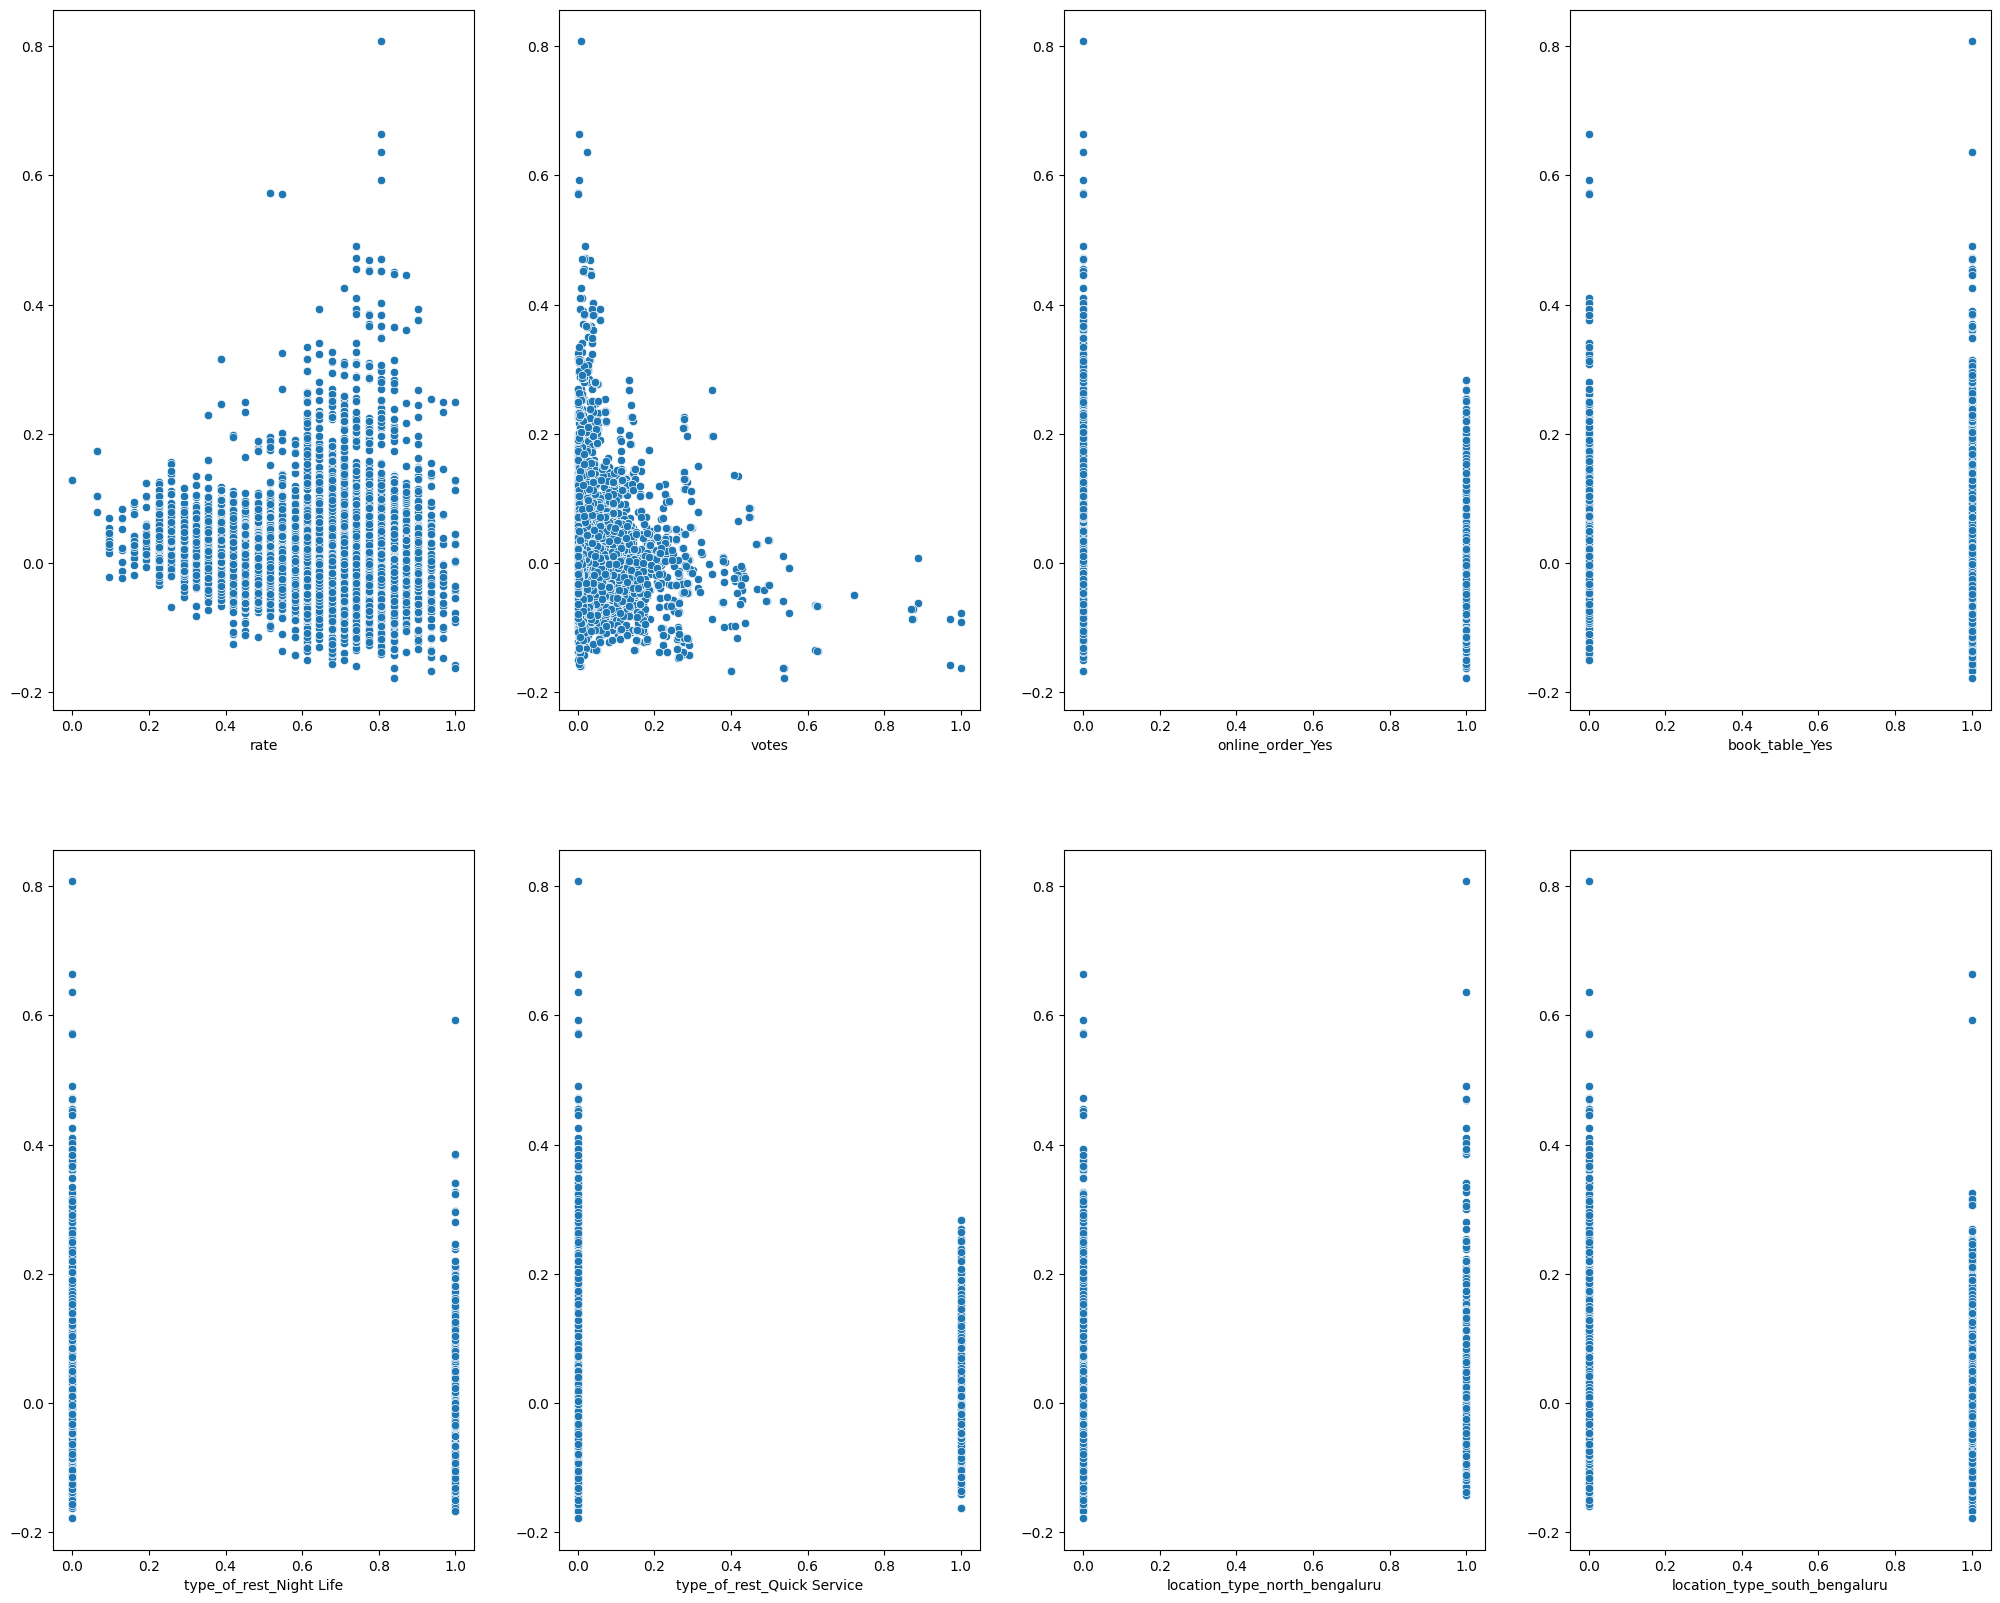

In [318]:

fig, ax = plt.subplots(nrows = 2, ncols= 4, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], linreg_fullmodel_scaled.resid , ax=subplot)

# display the plot
plt.show()

From the plots we see that none of the plots show a specific pattern much. Hence, we may conclude that the variables are linearly related to the dependent variable.

**Normality of Residuals**

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. The quantile-quantile(Q-Q) is a scatter plot that will help in validating the assumption of normal distribution in a data set.

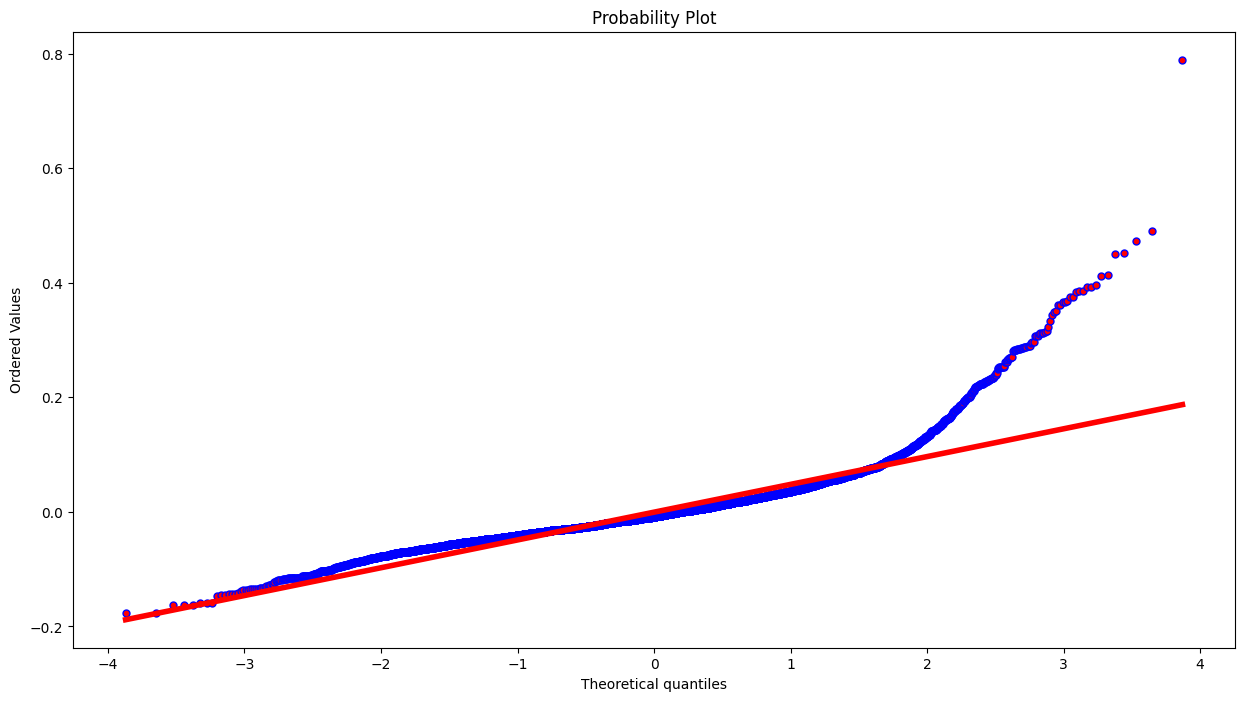

In [319]:
# calculate fitted values
fitted_vals = linreg_fullmodel_scaled.predict(X_test)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. This is expected as our target variable is not normally distributed.

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)**

In [320]:
# check the mean of the residual
linreg_fullmodel_scaled.resid.mean()

2.1979949273115457e-16

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [321]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=117584.849, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.

**Linear Regression with Interaction (OLS)**

In [451]:
# create a copy of the entire dataset to add the interaction effect using copy()
df_interaction = df_scaled.copy()

# add the interaction variable
df_interaction['votes_book_table'] = df_interaction['votes']*df_interaction['book_table_Yes'] 

# print the data with interaction
df_interaction.head()

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru,votes_book_table
0,0.741935,0.046043,0.127517,1,1,0,0,0,1,0.046043
1,0.741935,0.046756,0.127517,1,0,0,0,0,1,0.000000
2,0.645161,0.054539,0.127517,1,0,0,0,0,1,0.000000
3,0.612903,0.005228,0.043624,0,0,0,0,0,1,0.000000
4,0.645161,0.009862,0.093960,0,0,0,0,0,1,0.000000


In [385]:
X = df_interaction.drop(['approx_cost(for two people)'], axis=1)

# extract the target variable from the train set
y = df_interaction['approx_cost(for two people)']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (38281, 9)
The shape of X_test_interaction is: (12761, 9)
The shape of y_train is: (38281,)
The shape of y_test is: (12761,)


In [386]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                                     OLS Regression Results                                     
Dep. Variable:     approx_cost(for two people)   R-squared (uncentered):                   0.771
Model:                                     OLS   Adj. R-squared (uncentered):              0.771
Method:                          Least Squares   F-statistic:                          1.431e+04
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):                        0.00
Time:                                 15:41:32   Log-Likelihood:                          57044.
No. Observations:                        38281   AIC:                                 -1.141e+05
Df Residuals:                            38272   BIC:                                 -1.140e+05
Df Model:                                    9                                                  
Covariance Type:                     nonrobust                                                  
                              

In [325]:
# predict the 'charges' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_claim = y_test

In [326]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [327]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without_scaling,0.471648,0.471538,0.052647
1,Linreg full model with_scaling,0.471648,0.471538,0.052647
2,linreg_with_interaction,0.770894,0.770840,0.053489


From the summary output, The R-squared and adjusted R-squared value have significantly increased,Hence interaction is  useful

# Feature Selection

In [328]:
# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

**forward selection technique**

In [395]:
df_scaled

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,type_of_rest_Night Life,type_of_rest_Quick Service,location_type_north_bengaluru,location_type_south_bengaluru,votes_book_table
0,0.741935,0.046043,0.127517,1,1,0,0,0,1,0.046043
1,0.741935,0.046756,0.127517,1,0,0,0,0,1,0.000000
2,0.645161,0.054539,0.127517,1,0,0,0,0,1,0.000000
3,0.612903,0.005228,0.043624,0,0,0,0,0,1,0.000000
4,0.645161,0.009862,0.093960,0,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
51037,0.580645,0.001604,0.244966,0,0,1,0,0,1,0.000000
51038,0.613048,0.000000,0.093960,0,0,1,0,0,1,0.000000
51039,0.613048,0.000000,0.328859,0,0,1,0,0,1,0.000000
51040,0.806452,0.014021,0.412752,0,1,1,0,0,1,0.014021


In [387]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [391]:
X_scaled=df_scaled.drop(['approx_cost(for two people)'], axis=1)
y = df_scaled['approx_cost(for two people)']


In [392]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-23 15:56:20] Features: 1/6 -- score: 0.3791295946207744[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-08-23 15:56:20] Features: 2/6 -- score: 0.42214870759903905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2023-08-23 15:56:21] Features: 3/6 -- score: 0.4372844848108112[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

<Figure size 5000x5000 with 0 Axes>

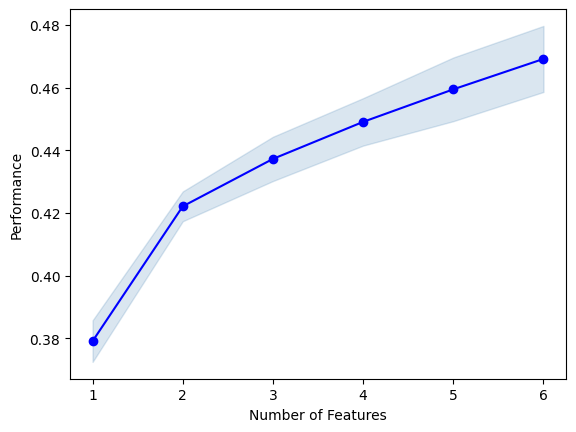

[('votes',
  'book_table_Yes',
  'type_of_rest_Night Life',
  'type_of_rest_Quick Service',
  'location_type_south_bengaluru',
  'votes_book_table')]

In [419]:
reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg, k_features = 6, forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_interaction, y_train)

from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])
imp_vars_forward

<Figure size 5000x5000 with 0 Axes>

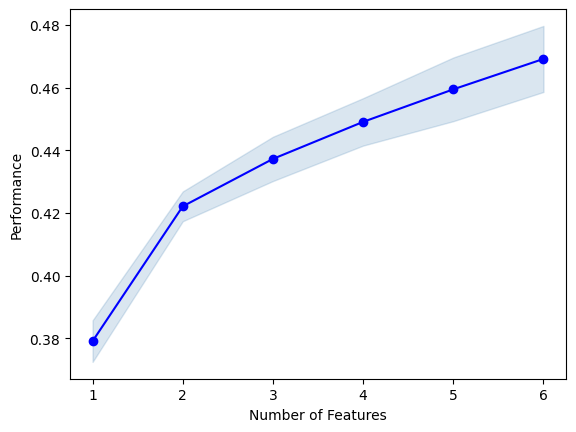

In [420]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

In [399]:
imp_vars_forward

[('votes',
  'book_table_Yes',
  'type_of_rest_Night Life',
  'type_of_rest_Quick Service',
  'votes_book_table')]

In [ ]:
#Another method

In [367]:
X = df_scaled.drop('approx_cost(for two people)', axis = 1)
y = df_scaled['approx_cost(for two people)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
linreg = LinearRegression()

In [368]:
linreg_forward = sfs(estimator = linreg, k_features = 5, forward = True, verbose = 2, scoring = 'r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-23 15:27:37] Features: 1/4 -- score: 0.38551390965762333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-08-23 15:27:38] Features: 2/4 -- score: 0.42827735089604424[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2023-08-23 15:27:38] Features: 3/4 -- score: 0.44369237416816365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [369]:
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('votes', 'book_table_Yes', 'type_of_rest_Night Life', 'type_of_rest_Quick Service')

R-squared:  0.4551345584240738


**forward selection technique**

In [345]:
linreg = LinearRegression()
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-23 15:13:08] Features: 1/9 -- score: 0.38551390965762333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-08-23 15:13:08] Features: 2/9 -- score: 0.42827735089604424[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2023-08-23 15:13:08] Features: 3/9 -- score: 0.44369237416816365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [346]:
# print the selected feature names 
print('Features selelected using forward selection are:\n ', sfs_forward.k_feature_names_)

# print the R- squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are:
  ('rate', 'votes', 'online_order_Yes', 'book_table_Yes', 'type_of_rest_Night Life', 'type_of_rest_Quick Service', 'location_type_north_bengaluru', 'location_type_south_bengaluru', 'votes_book_table')

R-Squared:  0.4836966753819688


**backward selection technique**

In [400]:
reg = LinearRegression()

# Build step forward feature selection
sfs2 = sfs(reg, k_features = 5, forward=False,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform Backward selection
sfs2 = sfs2.fit(X_train_interaction, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2023-08-23 15:47:46] Features: 8/5 -- score: 0.4784540502242741[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2023-08-23 15:47:47] Features: 7/5 -- score: 0.4745270114743653[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished

[2023-08-23 15:47:47] Features: 6/5 -- score: 0.4691864199762309[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [401]:
sfs2.k_feature_names_

('votes',
 'book_table_Yes',
 'type_of_rest_Night Life',
 'type_of_rest_Quick Service',
 'votes_book_table')

In [ ]:
#ANother Method

In [347]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2')
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished

[2023-08-23 15:13:16] Features: 8/1 -- score: 0.4827474939423243[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2023-08-23 15:13:17] Features: 7/1 -- score: 0.47902051036591226[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished

[2023-08-23 15:13:17] Features: 6/1 -- score: 0.4736329807306487[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [348]:
print('Features selelected using backward elimination are: \n ', sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
  ('rate', 'votes', 'online_order_Yes', 'book_table_Yes', 'type_of_rest_Night Life', 'type_of_rest_Quick Service', 'location_type_north_bengaluru', 'location_type_south_bengaluru', 'votes_book_table')

R-squared:  0.4836966753819688


**ExhaustiveFeatureSelector**

In [402]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [404]:
efs = EFS(LinearRegression(),min_features=1,max_features=5,scoring='r2',cv=5,n_jobs=-1)
efs.fit(X_train_scaled,y_train_scaled)

Features: 381/381

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8]],
                          max_features=5, n_jobs=-1, scoring='r2')

In [405]:
efs.best_feature_names_

('votes',
 'book_table_Yes',
 'type_of_rest_Night Life',
 'type_of_rest_Quick Service',
 'votes_book_table')

# Gradient Descent

In [378]:
from sklearn.linear_model import SGDRegressor
X = df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, random_state=42)

# Fit the model on the training data
sgd_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = sgd_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.003020311314190776


In [379]:
# Calculate the R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.4486942253109212


 **Linear Regression with SGD using GridSearchCV**

In [422]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000, 3000]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

print("Best Parameters:", best_params)

Mean Squared Error: 0.0027993914117302827
R-squared: 0.47233084902070965
Best Parameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}


# Mini Batch GD

In [429]:
from sklearn.linear_model import SGDRegressor
X = df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor with mini-batch gradient descent
sgd_regressor = SGDRegressor(max_iter=1000, random_state=42, learning_rate='adaptive', eta0=0.01)

# Fit the model on the training data using mini-batch updates
sgd_regressor.partial_fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = sgd_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0028646732337327583


In [424]:
 r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)

R-squared value: 0.47233084902070965


# Ridge Linear Regression

In [432]:
from sklearn.linear_model import Ridge
# Define the features and target variable
X = df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge model
ridge_model = Ridge(alpha=0.001)  # You can adjust the alpha parameter

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0028016023334562134


In [433]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)

R-squared value: 0.48140525229442077


# Lasso Regression

In [436]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df_scaled is your DataFrame with scaled features

# Define the features and target variable
X = df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model
lasso_model = Lasso(alpha=0.0001)  # You can adjust the alpha parameter

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = lasso_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)


R-squared value: 0.47255169783774065


# Elastic Net

In [437]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df_scaled is your DataFrame with scaled features

# Define the features and target variable
X = df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ElasticNet model
elastic_net_model = ElasticNet(alpha=0.0001, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters

# Fit the model on the training data
elastic_net_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = elastic_net_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)


R-squared value: 0.47847832429409065


In [439]:
ridge_best_alpha = Ridge(alpha = 0.0001, max_iter = 500)

In [ ]:
#CV

In [440]:
scores = cross_val_score(ridge_best_alpha,X=X_train_scaled,y=y_train_scaled,cv=10,scoring='r2',n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


In [441]:
print('The scores : ',scores)
print('The mean score : ',np.mean(scores))
print('The Std score : ',np.std(scores))

The scores :  [0.48436581 0.48885059 0.46725761 0.46253529 0.50642891 0.47473099
 0.46008218 0.48077292 0.46974531 0.50035906]
The mean score :  0.4795128660920204
The Std score :  0.014851335597329682


In [450]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df is your DataFrame

# Define the features and target variable
#X = df_scaled[['votes', 'book_table_Yes', 'type_of_rest_Night Life', 'type_of_rest_Quick Service', 'location_type_south_bengaluru', 'votes_book_table','rate']]
X=df_scaled.drop(columns=['approx_cost(for two people)'])
y = df_scaled['approx_cost(for two people)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = linear_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared value:", r2)


R-squared value: 0.48140500613529913


In [480]:
X = df_interaction.drop(['approx_cost(for two people)'], axis=1)

# extract the target variable from the train set
y = df_interaction['approx_cost(for two people)']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=100,train_size=0.8)


In [482]:
X_train_interaction = sm.add_constant(X_train_interaction)
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()
print(linreg_with_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.480
Model:                                     OLS   Adj. R-squared:                  0.480
Method:                          Least Squares   F-statistic:                     4185.
Date:                         Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                                 16:20:07   Log-Likelihood:                 61773.
No. Observations:                        40833   AIC:                        -1.235e+05
Df Residuals:                            40823   BIC:                        -1.234e+05
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------